In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_German = df[df['job_country'] == 'Germany']

In [4]:
df_skills = df_German.explode('job_skills')
df_skills[['job_skills', 'job_title']]

,job_skills,job_title
2,python,"Data Engineer/Scientist/Analyst, Mid or Senior..."
2,sql,"Data Engineer/Scientist/Analyst, Mid or Senior..."
2,c#,"Data Engineer/Scientist/Analyst, Mid or Senior..."
2,azure,"Data Engineer/Scientist/Analyst, Mid or Senior..."
2,airflow,"Data Engineer/Scientist/Analyst, Mid or Senior..."
...,...,...
785735,docker,Senior Data Engineer
785737,sas,CRM Data Analyst
785737,sas,CRM Data Analyst
785737,sql,CRM Data Analyst


In [9]:
df_skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
1377,zoom,Machine Learning Engineer,1
26,angular,Senior Data Scientist,1
12,alteryx,Cloud Engineer,1
1380,zoom,Senior Data Scientist,1


In [13]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

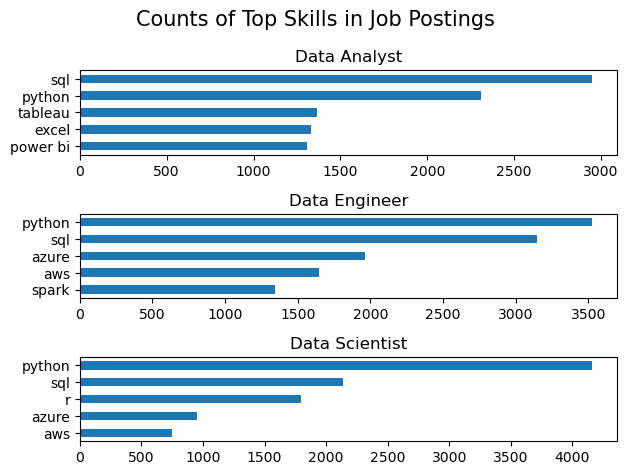

In [26]:
fig, ax = plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) 
fig.tight_layout()
plt.show()   



In [28]:
df_job_title_count = df_German['job_title_short'].value_counts().reset_index(name='jobs_total')

In [32]:
job_title_perc = pd.merge(df_skills_count, df_job_title_count , how='left', on='job_title_short')
job_title_perc['skill_percent'] = 100 * job_title_perc['skill_count'] / job_title_perc['jobs_total']
job_title_perc


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,4157,6745,61.630838
1,python,Data Engineer,3524,6675,52.794007
2,sql,Data Engineer,3145,6675,47.116105
3,sql,Data Analyst,2947,7131,41.326602
4,python,Data Analyst,2309,7131,32.379750
...,...,...,...,...,...
1377,zoom,Machine Learning Engineer,1,402,0.248756
1378,angular,Senior Data Scientist,1,1737,0.057571
1379,alteryx,Cloud Engineer,1,189,0.529101
1380,zoom,Senior Data Scientist,1,1737,0.057571


In [34]:
import seaborn as sns

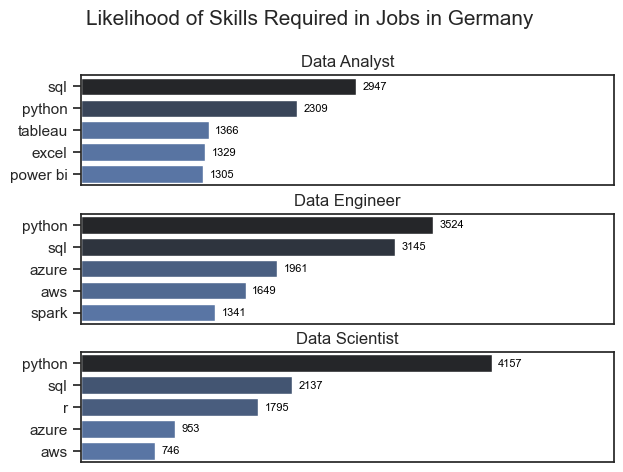

In [51]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot = job_title_perc[job_title_perc['job_title_short'] == job_title].head(5)
    #df_plot.plot(kind='barh', x = 'job_skills', y='skill_percent', ax=ax[i], title = job_title)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 80)

    for n, (count, percent) in enumerate(zip(df_plot['skill_count'], df_plot['skill_percent'])):
    # Push inside or just next to bar
         if percent < 75:
             ax[i].text(percent + 1, n, f'{count}', va='center', fontsize=8, color='black')
         else:
             ax[i].text(percent - 2, n, f'{count}', va='center', fontsize=8, color='white', ha='right')
    
    if i != len(job_title) - 1:
        ax[i].set_xticks([])
    

fig.suptitle('Likelihood of Skills Required in Jobs in Germany ', fontsize=15) 
fig.tight_layout(h_pad=0.5)
plt.show() 